In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Retrieve data

In [43]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


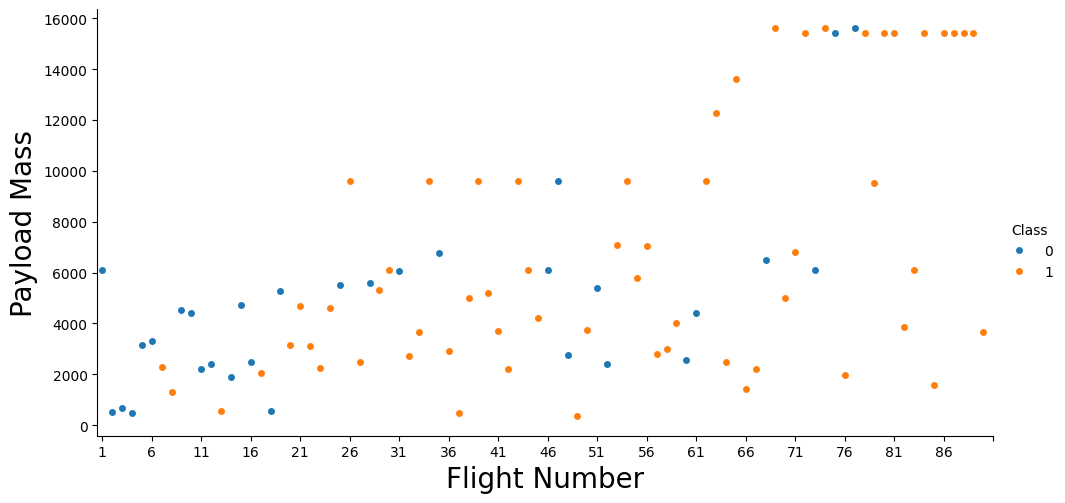

In [44]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue='Class', data=df, aspect=2)
plt.xlabel('Flight Number', fontsize=20)
plt.ylabel('Payload Mass', fontsize=20)
plt.xticks(np.arange(0, 91, 5))
plt.show()

Visualize the relationship between Flight Number and Launch Site

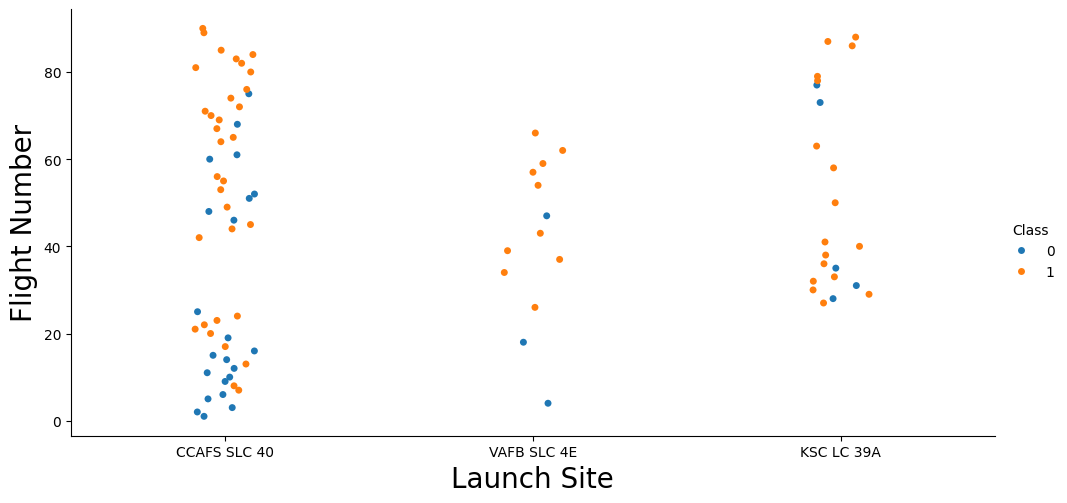

In [45]:
sns.catplot(y="FlightNumber", x="LaunchSite", hue='Class', data=df, aspect=2)
plt.xlabel('Launch Site', fontsize=20)
plt.ylabel('Flight Number', fontsize=20)
plt.show()

Visualize the relationship between Payload and Launch Site

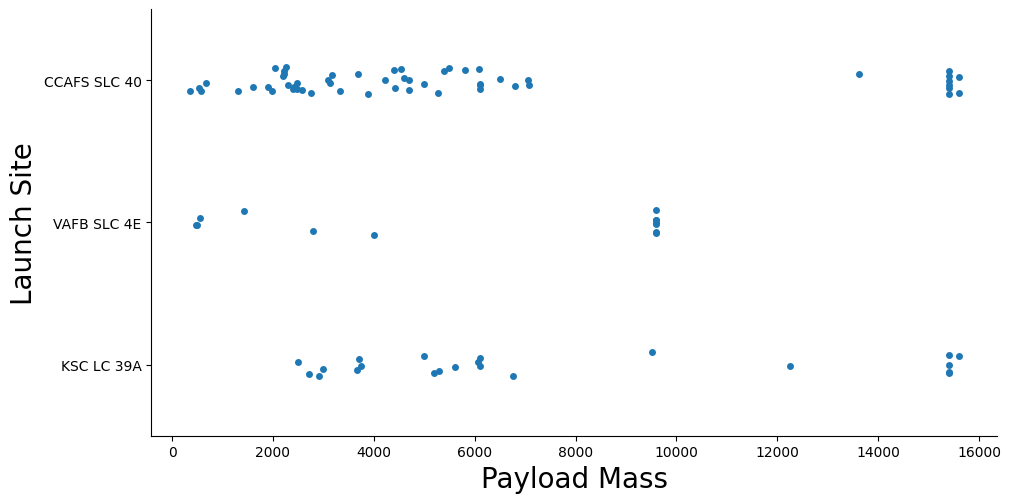

In [46]:
sns.catplot(x='PayloadMass', y='LaunchSite', data=df, aspect=2)
plt.xlabel('Payload Mass', fontsize=20)
plt.ylabel('Launch Site', fontsize=20)
plt.show()

Visualize the relationship between success rate of each orbit type

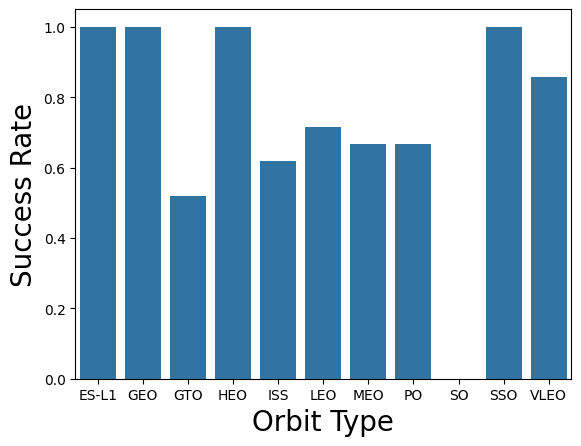

In [47]:
success_rate = df.groupby('Orbit')['Class'].mean()
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.xlabel('Orbit Type', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.show()

Visualize the relationship between FlightNumber and Orbit type

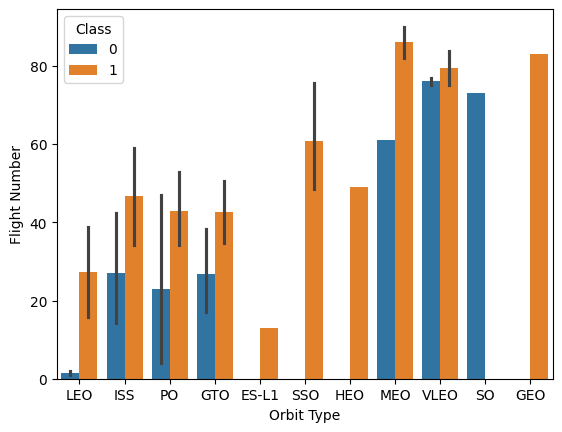

In [48]:
sns.barplot(x="Orbit", y="FlightNumber", data=df, hue="Class")
plt.xlabel("Orbit Type")
plt.ylabel("Flight Number")
plt.show()

Visualize the relationship between Payload and Orbit type

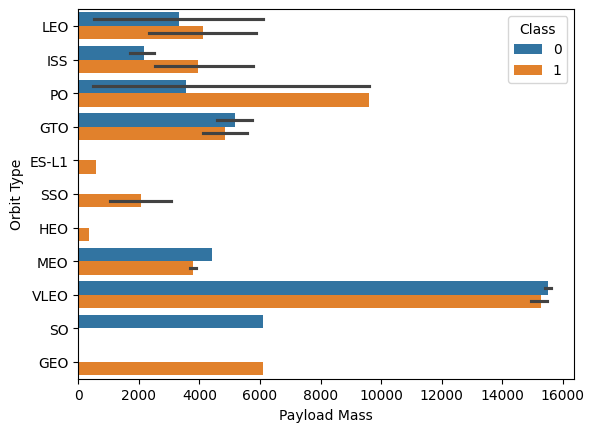

In [49]:
sns.barplot(x="PayloadMass", y="Orbit", data=df, hue="Class")
plt.xlabel("Payload Mass")
plt.ylabel("Orbit Type")
plt.show()

Visualize the launch success yearly trend

In [50]:
year=[]
def Extract_year():
  for i in df["Date"]:
    year.append(i.split("-")[0])
  return year
Extract_year()
df['Date']= year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


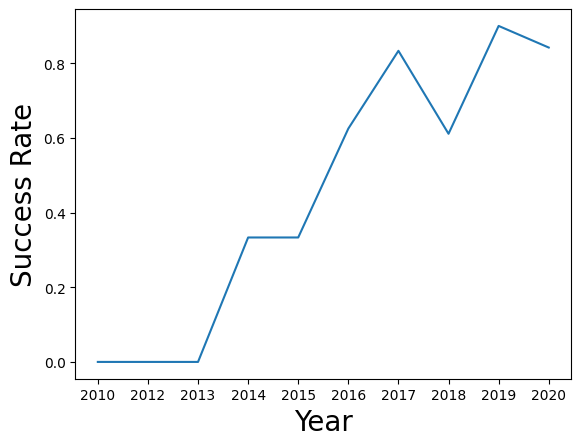

In [51]:
success_rate_per_year = df.groupby('Date')['Class'].mean()
sns.lineplot(x=success_rate_per_year.index, y=success_rate_per_year.values)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Success Rate', fontsize=20)
plt.show()

Features Engineering

In [52]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


Create dummy variables to categorical columns

In [53]:
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [54]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']).astype(int)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Cast all numeric columns to `float64`

In [55]:
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype(float)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
features_one_hot.shape

(90, 80)

In [56]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)